**SWEDISH HOUSING PREDICTION - EDA**

# Outline

# 1 - Data Import

In [ ]:
pip install geopandas

In [ ]:
import pandas as pd                             
import matplotlib.pyplot as plt              
import json as json                             
import numpy as np                              
import seaborn as sns                           
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import time

import geopandas as gpd

pd.set_option('display.max_columns', None)  # Show all columns in display
pd.set_option('display.width', 1000)       # Adjust the display width

In [3]:
#load df
annualreport_df = pd.read_csv('AnnualReport.csv')
apartment_df = pd.read_csv('Apartment.csv')
housingassociation_df = pd.read_csv('HousingAssociation.csv')

In [10]:
annualreport_df.head()

,Unnamed: 0,org_number,fiscal_year,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area
0,0,556024-1415,2023,lowered_tax_liability,NaN,2034400,0.0,15,0.0,156000.0,NaN,1752,2034400,NaN,NaN
1,1,702000-0035,2018,lowered_tax_liability,0.0,1276480,0.0,20,1.0,31000.0,0.0,1701,1276480,4592.0,0.0
2,2,702000-0282,2018,lowered_tax_liability,0.0,5775000,0.0,52,0.0,216000.0,0.0,3776,5775000,952.0,0.0
3,3,702000-0282,2019,lowered_tax_liability,0.0,15775000,0.0,52,0.0,101000.0,0.0,3776,15775000,952.0,0.0
4,4,702000-0282,2021,other,0.0,20855000,0.0,51,0.0,96000.0,0.0,3776,20855000,952.0,0.0


In [4]:
#Fix the format
def drop(df):
  df.drop(['Unnamed: 0'], axis=1, inplace=True)
  return df

annualreport_df = drop(annualreport_df)
apartment_df = drop(apartment_df)
housingassociation_df = drop(housingassociation_df)

annualreport_df.head()

,org_number,fiscal_year,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area
0,556024-1415,2023,lowered_tax_liability,NaN,2034400,0.0,15,0.0,156000.0,NaN,1752,2034400,NaN,NaN
1,702000-0035,2018,lowered_tax_liability,0.0,1276480,0.0,20,1.0,31000.0,0.0,1701,1276480,4592.0,0.0
2,702000-0282,2018,lowered_tax_liability,0.0,5775000,0.0,52,0.0,216000.0,0.0,3776,5775000,952.0,0.0
3,702000-0282,2019,lowered_tax_liability,0.0,15775000,0.0,52,0.0,101000.0,0.0,3776,15775000,952.0,0.0
4,702000-0282,2021,other,0.0,20855000,0.0,51,0.0,96000.0,0.0,3776,20855000,952.0,0.0


In [12]:
apartment_df.head()

,id,additional_area,agency_id,amenities,asking_price,brokers_description,cover_photo_description,customer_area_description,district,energy_class,floor,has_balcony,has_fireplace,has_patio,has_solar_panels,heating,height,housing_association_fee,housing_association_org_number,id2,index,is_new_construction,key,latitude,living_area,locality,location,longitude,municipality,object_type,operating_cost,plot_area,populated_area,postcode,primary_area,region,rooms,sell_date,street_address,width,sell_price
0,00001ce3c1dde1c941837a0e5d3bfee4,NaN,26.0,NaN,NaN,Karlshamns kommun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095676-2016-05-19,186932,NaN,NaN,56.165330,120.0,NaN,Södra Sverige,14.880469,Karlshamn,Rowhouse,2475.0,206.0,Karlshamn,37434.0,Karlshamn,Blekinge län,5.0,2016-05-19,Hunnemaravägen 49,NaN,2900000.0
1,0000427e3712a9d0839d903d34ed3dcf,NaN,400.0,NaN,590000.0,Kristinehamn,NaN,Centrum,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5309.0,716411-2356,3184962-2018-07-04,803234,NaN,NaN,59.308009,86.0,NaN,Mellersta Sverige,14.107737,Kristinehamn,Apartment,NaN,NaN,Kristinehamn,68131.0,Kristinehamn,Värmlands län,3.0,2018-07-04,Spelmansgatan 34,NaN,680000.0
2,000046b15639c0808f53b408c0cca63d,NaN,NaN,NaN,NaN,Riksby,NaN,Västerort,Bromma,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2893.0,702001-7807,4101858-2021-02-05,76752,NaN,NaN,59.340393,54.0,Riksby,Storstockholm,17.942555,Stockholm,Apartment,375.0,NaN,NaN,16874.0,Bromma,Stockholms län,NaN,2021-02-05,Kvarnbacksvägen 123,NaN,3000000.0
3,000069b14f835d4e3ace0507c65eca8c,NaN,16.0,NaN,1795000.0,Tyresö Strand,NaN,Stockholms skärgård,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3354.0,769606-6088,3382270-2019-04-24,933841,NaN,NaN,59.243462,42.0,NaN,Storstockholm,18.284143,Tyresö,Apartment,463.0,NaN,NaN,13563.0,Tyresö,Stockholms län,2.0,2019-04-24,Målarprinsens väg 2,NaN,1940000.0
4,00007b869dea7243f1da92b265261807,NaN,12.0,elevator,NaN,Tureberg,NaN,Bagarby,NaN,NaN,4.0,NaN,NaN,NaN,NaN,district,NaN,3870.0,769636-4137,5208727-2024-02-08,808147,NaN,NaN,59.427760,94.0,NaN,Storstockholm,17.944397,Sollentuna,Apartment,453.0,NaN,NaN,19160.0,Sollentuna,Stockholms län,4.0,2024-02-08,Malmvägen 16C,NaN,2750000.0


In [13]:
housingassociation_df.head()

,org_number,name,construction_year,housing_coop_id
0,556024-1415,Fastighetsaktiebolaget Stiftstaden,NaN,271444
1,702000-0035,BRF 1917 Års Bostadslotteri,1919.0,268958
2,702000-0282,BF Alfa upa,1912.0,77812
3,702000-0399,BRF Alviksgården 2,1944.0,79604
4,702000-0407,BRF Alviken nr 10,NaN,275452


## 1.1 Data Preprocessing

In [5]:
housingassociation_df.org_number.nunique()

24999

In [6]:
annualreport_df.org_number.nunique()

24999

We can join annualreport with housingassociation

In [7]:
annualreport_joined = annualreport_df.merge(housingassociation_df, on='org_number', how='left')
annualreport_joined.head()

,org_number,fiscal_year,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,name,construction_year,housing_coop_id
0,556024-1415,2023,lowered_tax_liability,NaN,2034400,0.0,15,0.0,156000.0,NaN,1752,2034400,NaN,NaN,Fastighetsaktiebolaget Stiftstaden,NaN,271444
1,702000-0035,2018,lowered_tax_liability,0.0,1276480,0.0,20,1.0,31000.0,0.0,1701,1276480,4592.0,0.0,BRF 1917 Års Bostadslotteri,1919.0,268958
2,702000-0282,2018,lowered_tax_liability,0.0,5775000,0.0,52,0.0,216000.0,0.0,3776,5775000,952.0,0.0,BF Alfa upa,1912.0,77812
3,702000-0282,2019,lowered_tax_liability,0.0,15775000,0.0,52,0.0,101000.0,0.0,3776,15775000,952.0,0.0,BF Alfa upa,1912.0,77812
4,702000-0282,2021,other,0.0,20855000,0.0,51,0.0,96000.0,0.0,3776,20855000,952.0,0.0,BF Alfa upa,1912.0,77812


In [8]:
apartment_df.housing_association_org_number.nunique()

24885

- At least 100 org_number missing in apartment_df
- Now lets join apartment_df with annualreport_joined. Join on key org_number, fiscal_year

In [9]:
apartment_df.info()
#668,801 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668801 entries, 0 to 668800
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              668801 non-null  object 
 1   additional_area                 26054 non-null   float64
 2   agency_id                       559867 non-null  float64
 3   amenities                       87235 non-null   object 
 4   asking_price                    482084 non-null  float64
 5   brokers_description             668801 non-null  object 
 6   cover_photo_description         359 non-null     object 
 7   customer_area_description       585396 non-null  object 
 8   district                        235391 non-null  object 
 9   energy_class                    55095 non-null   object 
 10  floor                           504980 non-null  float64
 11  has_balcony                     168 non-null     float64
 12  has_fireplace   

In [10]:
#Convert to
apartment_df['sell_date'] = pd.to_datetime(apartment_df['sell_date'])

In [11]:
#Create fiscal year to join
apartment_df['fiscal_year'] = apartment_df['sell_date'].dt.year

In [12]:
apartment_joined = apartment_df.merge(annualreport_joined, left_on=['housing_association_org_number', 'fiscal_year'], right_on=['org_number', 'fiscal_year'], how='left')
apartment_joined.drop(['org_number'], axis=1, inplace=True)
apartment_joined.head()

,id,additional_area,agency_id,amenities,asking_price,brokers_description,cover_photo_description,customer_area_description,district,energy_class,floor,has_balcony,has_fireplace,has_patio,has_solar_panels,heating,height,housing_association_fee,housing_association_org_number,id2,index,is_new_construction,key,latitude,living_area,locality,location,longitude,municipality,object_type,operating_cost,plot_area,populated_area,postcode,primary_area,region,rooms,sell_date,street_address,width,sell_price,fiscal_year,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,name,construction_year,housing_coop_id
0,00001ce3c1dde1c941837a0e5d3bfee4,NaN,26.0,NaN,NaN,Karlshamns kommun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095676-2016-05-19,186932,NaN,NaN,56.165330,120.0,NaN,Södra Sverige,14.880469,Karlshamn,Rowhouse,2475.0,206.0,Karlshamn,37434.0,Karlshamn,Blekinge län,5.0,2016-05-19,Hunnemaravägen 49,NaN,2900000.0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000427e3712a9d0839d903d34ed3dcf,NaN,400.0,NaN,590000.0,Kristinehamn,NaN,Centrum,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5309.0,716411-2356,3184962-2018-07-04,803234,NaN,NaN,59.308009,86.0,NaN,Mellersta Sverige,14.107737,Kristinehamn,Apartment,NaN,NaN,Kristinehamn,68131.0,Kristinehamn,Värmlands län,3.0,2018-07-04,Spelmansgatan 34,NaN,680000.0,2018,lowered_tax_liability,0.0,45821318.0,0.0,57.0,0.0,410000.0,0.0,4654.0,45821318.0,0.0,0.0,HSB Brf Capella i Kristinehamn,1988.0,51850.0
2,000046b15639c0808f53b408c0cca63d,NaN,NaN,NaN,NaN,Riksby,NaN,Västerort,Bromma,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2893.0,702001-7807,4101858-2021-02-05,76752,NaN,NaN,59.340393,54.0,Riksby,Storstockholm,17.942555,Stockholm,Apartment,375.0,NaN,NaN,16874.0,Bromma,Stockholms län,NaN,2021-02-05,Kvarnbacksvägen 123,NaN,3000000.0,2021,lowered_tax_liability,40000.0,26780000.0,0.0,318.0,1.0,69000.0,1557.0,16014.0,26820000.0,0.0,0.0,BRF Riksby,1942.0,54027.0
3,000069b14f835d4e3ace0507c65eca8c,NaN,16.0,NaN,1795000.0,Tyresö Strand,NaN,Stockholms skärgård,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3354.0,769606-6088,3382270-2019-04-24,933841,NaN,NaN,59.243462,42.0,NaN,Storstockholm,18.284143,Tyresö,Apartment,463.0,NaN,NaN,13563.0,Tyresö,Stockholms län,2.0,2019-04-24,Målarprinsens väg 2,NaN,1940000.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00007b869dea7243f1da92b265261807,NaN,12.0,elevator,NaN,Tureberg,NaN,Bagarby,NaN,NaN,4.0,NaN,NaN,NaN,NaN,district,NaN,3870.0,769636-4137,5208727-2024-02-08,808147,NaN,NaN,59.427760,94.0,NaN,Storstockholm,17.944397,Sollentuna,Apartment,453.0,NaN,NaN,19160.0,Sollentuna,Stockholms län,4.0,2024-02-08,Malmvägen 16C,NaN,2750000.0,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
apartment_joined.shape
#668,801 entries - Aligned - Good!

(668801, 57)

In [14]:
apartment_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668801 entries, 0 to 668800
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              668801 non-null  object        
 1   additional_area                 26054 non-null   float64       
 2   agency_id                       559867 non-null  float64       
 3   amenities                       87235 non-null   object        
 4   asking_price                    482084 non-null  float64       
 5   brokers_description             668801 non-null  object        
 6   cover_photo_description         359 non-null     object        
 7   customer_area_description       585396 non-null  object        
 8   district                        235391 non-null  object        
 9   energy_class                    55095 non-null   object        
 10  floor                           504980 non-null  float64

In [15]:
# Need to format  housing_coop_id, construction_year, number_of_units, number_of_rental_units, rooms, postcode, floor, agency_id from float to in64
columns_to_convert = ['housing_coop_id', 'construction_year', 'number_of_units', 'number_of_rental_units', 'rooms', 'postcode', 'floor', 'agency_id']
apartment_joined[columns_to_convert] = apartment_joined[columns_to_convert].astype('Int64')
apartment_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668801 entries, 0 to 668800
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              668801 non-null  object        
 1   additional_area                 26054 non-null   float64       
 2   agency_id                       559867 non-null  Int64         
 3   amenities                       87235 non-null   object        
 4   asking_price                    482084 non-null  float64       
 5   brokers_description             668801 non-null  object        
 6   cover_photo_description         359 non-null     object        
 7   customer_area_description       585396 non-null  object        
 8   district                        235391 non-null  object        
 9   energy_class                    55095 non-null   object        
 10  floor                           504980 non-null  Int64  

To Maurus:
- Now You need to rename some columns to easily understand (from the housing_df we already joined)

In [16]:
apartment_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668801 entries, 0 to 668800
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              668801 non-null  object        
 1   additional_area                 26054 non-null   float64       
 2   agency_id                       559867 non-null  Int64         
 3   amenities                       87235 non-null   object        
 4   asking_price                    482084 non-null  float64       
 5   brokers_description             668801 non-null  object        
 6   cover_photo_description         359 non-null     object        
 7   customer_area_description       585396 non-null  object        
 8   district                        235391 non-null  object        
 9   energy_class                    55095 non-null   object        
 10  floor                           504980 non-null  Int64  

In [17]:
#for eg: name in column 54
apartment_joined.rename(columns={
    'name': 'housing_association_name',
    'savings': 'housing_association_savings'
    }, inplace=True)



#other columns you see need to rename to ez understand, do the same like above

# 2 - EDA

## 2.1 Annual Report

In [18]:
annualreport_joined.head()

,org_number,fiscal_year,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,name,construction_year,housing_coop_id
0,556024-1415,2023,lowered_tax_liability,NaN,2034400,0.0,15,0.0,156000.0,NaN,1752,2034400,NaN,NaN,Fastighetsaktiebolaget Stiftstaden,NaN,271444
1,702000-0035,2018,lowered_tax_liability,0.0,1276480,0.0,20,1.0,31000.0,0.0,1701,1276480,4592.0,0.0,BRF 1917 Års Bostadslotteri,1919.0,268958
2,702000-0282,2018,lowered_tax_liability,0.0,5775000,0.0,52,0.0,216000.0,0.0,3776,5775000,952.0,0.0,BF Alfa upa,1912.0,77812
3,702000-0282,2019,lowered_tax_liability,0.0,15775000,0.0,52,0.0,101000.0,0.0,3776,15775000,952.0,0.0,BF Alfa upa,1912.0,77812
4,702000-0282,2021,other,0.0,20855000,0.0,51,0.0,96000.0,0.0,3776,20855000,952.0,0.0,BF Alfa upa,1912.0,77812


In [19]:
#housing_coop_id is not needed, rename some columns to more understand

annualreport_joined.drop(columns='housing_coop_id', inplace=True)
annualreport_joined.rename(columns={'name' : 'housing_association_name'}, inplace=True)


In [20]:
#df[~df.housing_coop_id.isnull()].head()

How many housing association we have?

In [21]:
annualreport_joined['org_number'].nunique() #24999

24999

How many association_tax_liability types?

In [22]:
annualreport_joined['association_tax_liability'].value_counts()
# 99% of them are lowered_tax_liability. As the teacher said, we can impute all NA with lowered_tax_liability in apartment_df

association_tax_liability
lowered_tax_liability     81901
other                       382
standard_tax_liability      374
Name: count, dtype: int64

Now lets see Missing values of annual report

In [23]:
annualreport_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83206 entries, 0 to 83205
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   org_number                  83206 non-null  object 
 1   fiscal_year                 83206 non-null  int64  
 2   association_tax_liability   82657 non-null  object 
 3   long_term_debt_other        45526 non-null  float64
 4   long_term_real_estate_debt  83206 non-null  int64  
 5   number_of_rental_units      81554 non-null  float64
 6   number_of_units             83206 non-null  int64  
 7   plot_is_leased              82399 non-null  float64
 8   savings                     82701 non-null  float64
 9   total_commercial_area       70440 non-null  float64
 10  total_living_area           83206 non-null  int64  
 11  total_loan                  83206 non-null  int64  
 12  total_plot_area             69668 non-null  float64
 13  total_rental_area           679

Really need to understand greatly. I believe that:
- association_tax_liability is sth impactful to the Price after all
- Besides, all features like long_term_deb, rental units, units, savings or total_living_area... are the infos of Housing Association, not the Apartment itself
- The apartment itself already have infos about living_area, plot_area, height and width... so those infos above may be not necessary

--> We need to be careful when join with the apartment_df, I suggest when join the df, only take housing_association_name and association_tax_liability

## 2.2 Apartment

### Interpreting columns

Lets see columns info and how much missing values they have

In [24]:
#create df for EDA for apartment
eda_apartment = apartment_df.copy()

In [25]:
eda_apartment.head()

,id,additional_area,agency_id,amenities,asking_price,brokers_description,cover_photo_description,customer_area_description,district,energy_class,floor,has_balcony,has_fireplace,has_patio,has_solar_panels,heating,height,housing_association_fee,housing_association_org_number,id2,index,is_new_construction,key,latitude,living_area,locality,location,longitude,municipality,object_type,operating_cost,plot_area,populated_area,postcode,primary_area,region,rooms,sell_date,street_address,width,sell_price,fiscal_year
0,00001ce3c1dde1c941837a0e5d3bfee4,NaN,26.0,NaN,NaN,Karlshamns kommun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095676-2016-05-19,186932,NaN,NaN,56.165330,120.0,NaN,Södra Sverige,14.880469,Karlshamn,Rowhouse,2475.0,206.0,Karlshamn,37434.0,Karlshamn,Blekinge län,5.0,2016-05-19,Hunnemaravägen 49,NaN,2900000.0,2016
1,0000427e3712a9d0839d903d34ed3dcf,NaN,400.0,NaN,590000.0,Kristinehamn,NaN,Centrum,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5309.0,716411-2356,3184962-2018-07-04,803234,NaN,NaN,59.308009,86.0,NaN,Mellersta Sverige,14.107737,Kristinehamn,Apartment,NaN,NaN,Kristinehamn,68131.0,Kristinehamn,Värmlands län,3.0,2018-07-04,Spelmansgatan 34,NaN,680000.0,2018
2,000046b15639c0808f53b408c0cca63d,NaN,NaN,NaN,NaN,Riksby,NaN,Västerort,Bromma,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2893.0,702001-7807,4101858-2021-02-05,76752,NaN,NaN,59.340393,54.0,Riksby,Storstockholm,17.942555,Stockholm,Apartment,375.0,NaN,NaN,16874.0,Bromma,Stockholms län,NaN,2021-02-05,Kvarnbacksvägen 123,NaN,3000000.0,2021
3,000069b14f835d4e3ace0507c65eca8c,NaN,16.0,NaN,1795000.0,Tyresö Strand,NaN,Stockholms skärgård,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3354.0,769606-6088,3382270-2019-04-24,933841,NaN,NaN,59.243462,42.0,NaN,Storstockholm,18.284143,Tyresö,Apartment,463.0,NaN,NaN,13563.0,Tyresö,Stockholms län,2.0,2019-04-24,Målarprinsens väg 2,NaN,1940000.0,2019
4,00007b869dea7243f1da92b265261807,NaN,12.0,elevator,NaN,Tureberg,NaN,Bagarby,NaN,NaN,4.0,NaN,NaN,NaN,NaN,district,NaN,3870.0,769636-4137,5208727-2024-02-08,808147,NaN,NaN,59.427760,94.0,NaN,Storstockholm,17.944397,Sollentuna,Apartment,453.0,NaN,NaN,19160.0,Sollentuna,Stockholms län,4.0,2024-02-08,Malmvägen 16C,NaN,2750000.0,2024


In [26]:
eda_apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668801 entries, 0 to 668800
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              668801 non-null  object        
 1   additional_area                 26054 non-null   float64       
 2   agency_id                       559867 non-null  float64       
 3   amenities                       87235 non-null   object        
 4   asking_price                    482084 non-null  float64       
 5   brokers_description             668801 non-null  object        
 6   cover_photo_description         359 non-null     object        
 7   customer_area_description       585396 non-null  object        
 8   district                        235391 non-null  object        
 9   energy_class                    55095 non-null   object        
 10  floor                           504980 non-null  float64

In here, we see that:
- Some columns have lots of missing values: cover_photo, height, width...
- Some columns we dont understand about their meaning, I think we can drop: id (actually can be apartment_id, but we drop when putting to the model anw), id2, index, agency_id, key & amenities (explore below)

In [27]:
eda_apartment['key'].value_counts()

key
balcony      2259
patio        1040
elevator      210
fireplace     148
Name: count, dtype: int64

In [28]:
eda_apartment['amenities'].value_counts()

#OK so we understand key and amenities are some fields needed to be cleaned, and impute to the has_ columns

amenities
elevator,balcony                    24440
balcony                             20433
[]                                  19042
patio                                9386
elevator                             5162
elevator,patio                       2146
balcony,patio                        1591
balcony,fireplace                    1054
elevator,balcony,fireplace           1039
fireplace,patio                       993
fireplace                             992
elevator,balcony,patio                459
elevator,fireplace                    265
balcony,fireplace,patio               181
elevator,fireplace,patio               38
elevator,balcony,fireplace,patio       14
Name: count, dtype: int64

### Correlation with Target Label - Sell Price

In [29]:
eda_apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668801 entries, 0 to 668800
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              668801 non-null  object        
 1   additional_area                 26054 non-null   float64       
 2   agency_id                       559867 non-null  float64       
 3   amenities                       87235 non-null   object        
 4   asking_price                    482084 non-null  float64       
 5   brokers_description             668801 non-null  object        
 6   cover_photo_description         359 non-null     object        
 7   customer_area_description       585396 non-null  object        
 8   district                        235391 non-null  object        
 9   energy_class                    55095 non-null   object        
 10  floor                           504980 non-null  float64

Now we need to select some numeric columns to see how correlated they are with sell_price
- There are some categorical columns make have high correlated, but lets see that in the one-hot-encoding session
- We can take all columns that are numeric temporary. I also see sell_date can have some correlation maybe (seasonal factor). So we need to convert them to datetime, and extract year - month to see seasonal factor

In [30]:
eda_apartment['sell_date'] = pd.to_datetime(eda_apartment['sell_date'])
eda_apartment['Fiscal Year'] = eda_apartment['sell_date'].dt.year
eda_apartment['sell_month'] = eda_apartment['sell_date'].dt.month

In [31]:
#Now run some correlation

numeric_df = eda_apartment.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

sell_price_correlation = correlation_matrix[['sell_price']].sort_values(by='sell_price', ascending=False)
sell_price_correlation

,sell_price
sell_price,1.000000
asking_price,0.989878
has_fireplace,0.501736
living_area,0.348326
rooms,0.340767
width,0.252754
longitude,0.218686
height,0.211996
Fiscal Year,0.193119
fiscal_year,0.193119


Here we see funny observations:
- Highest correlated, have meanings: asking_price, has_fireplace, living_area, rooms, has_solar_panels...
- High correlated, but seems not meaningful: postcode (-0.4) - This one actually suspicious, but I believe it posed location seems to be interesting!
- Has_ columns: though lots of N/A, but highly correlated with sell_price. I believe that when we impute from amenities & key columns, we will have high impact has_ columns
- Meaningless columns: index, agency_id....

Now, lets create some key features list first, I think they are:

In [32]:
high_correlated_features = [
    'sell_price', 'asking_price', 'has_fireplace', 'living_area', 'rooms', 
    'width', 'longitude', 'height', 'Fiscal Year', 'operating_cost', 
    'floor', 'housing_association_fee', 'has_balcony', 'has_solar_panels'
]

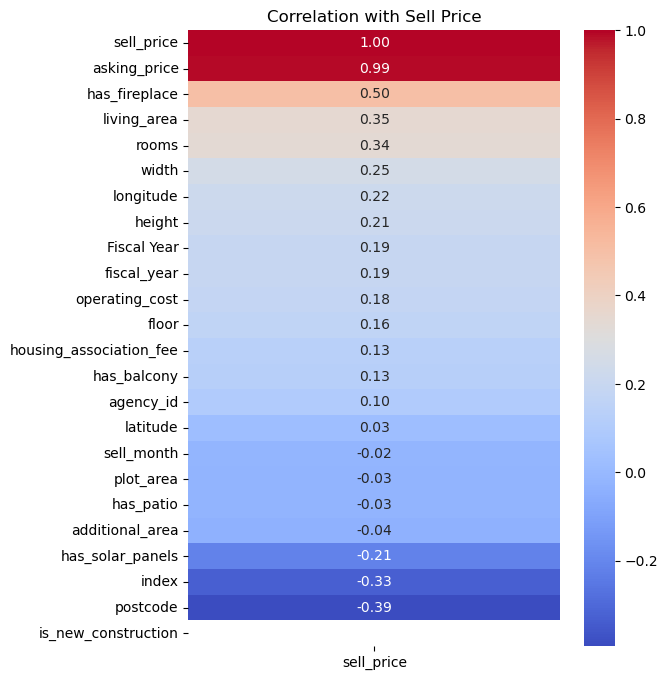

In [33]:
# Lets have some heatmap plot
plt.figure(figsize=(6, 8))
sns.heatmap(sell_price_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation with Sell Price')
plt.show()

Key Observations:
* **Positive Correlations**: Unsuprisingly, `asking_price` is highly correlated with `sell_price`. Furthermore, wee see that `living_area` and `rooms` show modest correlations with `sell_price`. `floor`, `housing_association_fee`, `longitude`, `operating_cost`, `fiscal_year`, `total_living_area`, `total_plot_area` has some correlation with `sell_price`.
* **Negative Correlations:** Negative correlations appear not as pronounced as the postive correlations. `number_of_units`,  `total_living_area` and `total_plot_area` (may suprise) appear negatively correlated.

For now, we'll focus on the variables showing the highest correlation with the target. Therefore, we define:

In [34]:
#This results saved for correlation all

apartment_joined.head()

numeric_df = apartment_joined.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

sell_price_correlation = correlation_matrix[['sell_price']].sort_values(by='sell_price', ascending=False)
sell_price_correlation

,sell_price
sell_price,1.000000
asking_price,0.989878
has_fireplace,0.501736
living_area,0.348326
rooms,0.340767
width,0.252754
longitude,0.218686
height,0.211996
fiscal_year,0.193119
operating_cost,0.183008


### Detect Outliers

From the above correlation matrix we determined a number of variables that may hold some predictive power for `sell_price`. Let's take a second look at these:

In [35]:
# Define the number of columns per row
cols_per_row = 4

# Calculate the number of rows needed
num_vars = len(focus_vars)
nrows = (num_vars // cols_per_row) + (1 if num_vars % cols_per_row != 0 else 0)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=cols_per_row, figsize=(10, 3 * nrows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate boxplots for each variable
for i, var in enumerate(focus_vars):
    sns.boxplot(data=apartment_joined, y=var, ax=axes[i])
    axes[i].set_title(var, fontsize=12)
    axes[i].set_ylabel("Value", fontsize=10)
    axes[i].set_xlabel(var, fontsize=10)

# Turn off any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()



NameError: name 'focus_vars' is not defined

In [ ]:
# Function to calculate outliers and share
def count_outliers_with_share(data, column):
    q1 = data[column].quantile(0.25)  # First quartile
    q3 = data[column].quantile(0.75)  # Third quartile
    iqr = q3 - q1                     # Interquartile range
    lower_bound = q1 - 1.5 * iqr      # Lower bound for outliers
    upper_bound = q3 + 1.5 * iqr      # Upper bound for outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    non_na_values = data[column].notna().sum()  # Count of non-missing values
    share = len(outliers) / non_na_values if non_na_values > 0 else 0
    return len(outliers), share

# Compute outliers and shares
outlier_results = {
    var: count_outliers_with_share(apartment_joined, var) for var in focus_vars
}

# Print results
for var, (count, share) in outlier_results.items():
    print(f"{var}: Outliers = {count}, Share = {share:.2%}")


asking_price: Outliers = 22628, Share = 4.69%
living_area: Outliers = 18002, Share = 2.71%
rooms: Outliers = 47551, Share = 7.19%
longitude: Outliers = 0, Share = 0.00%
fiscal_year: Outliers = 1771, Share = 0.26%
operating_cost: Outliers = 46468, Share = 12.13%
floor: Outliers = 21021, Share = 4.16%
housing_association_fee: Outliers = 8170, Share = 1.31%
total_living_area: Outliers = 20894, Share = 8.59%
number_of_units: Outliers = 21439, Share = 8.82%
total_plot_area: Outliers = 51060, Share = 23.40%


Key Observations:

* Each of the variables, at first glance, appears to have a large number of outliers (here, defined as values outside $ 1.5* IQR $). However, looking at the count of outliers relative to the count of non-NaN values in for each variable, we see that outliers are not as severe as initially thought. However, more on that later on...
* Consider to impute outliers <5%


### Distribution of highly correlated features

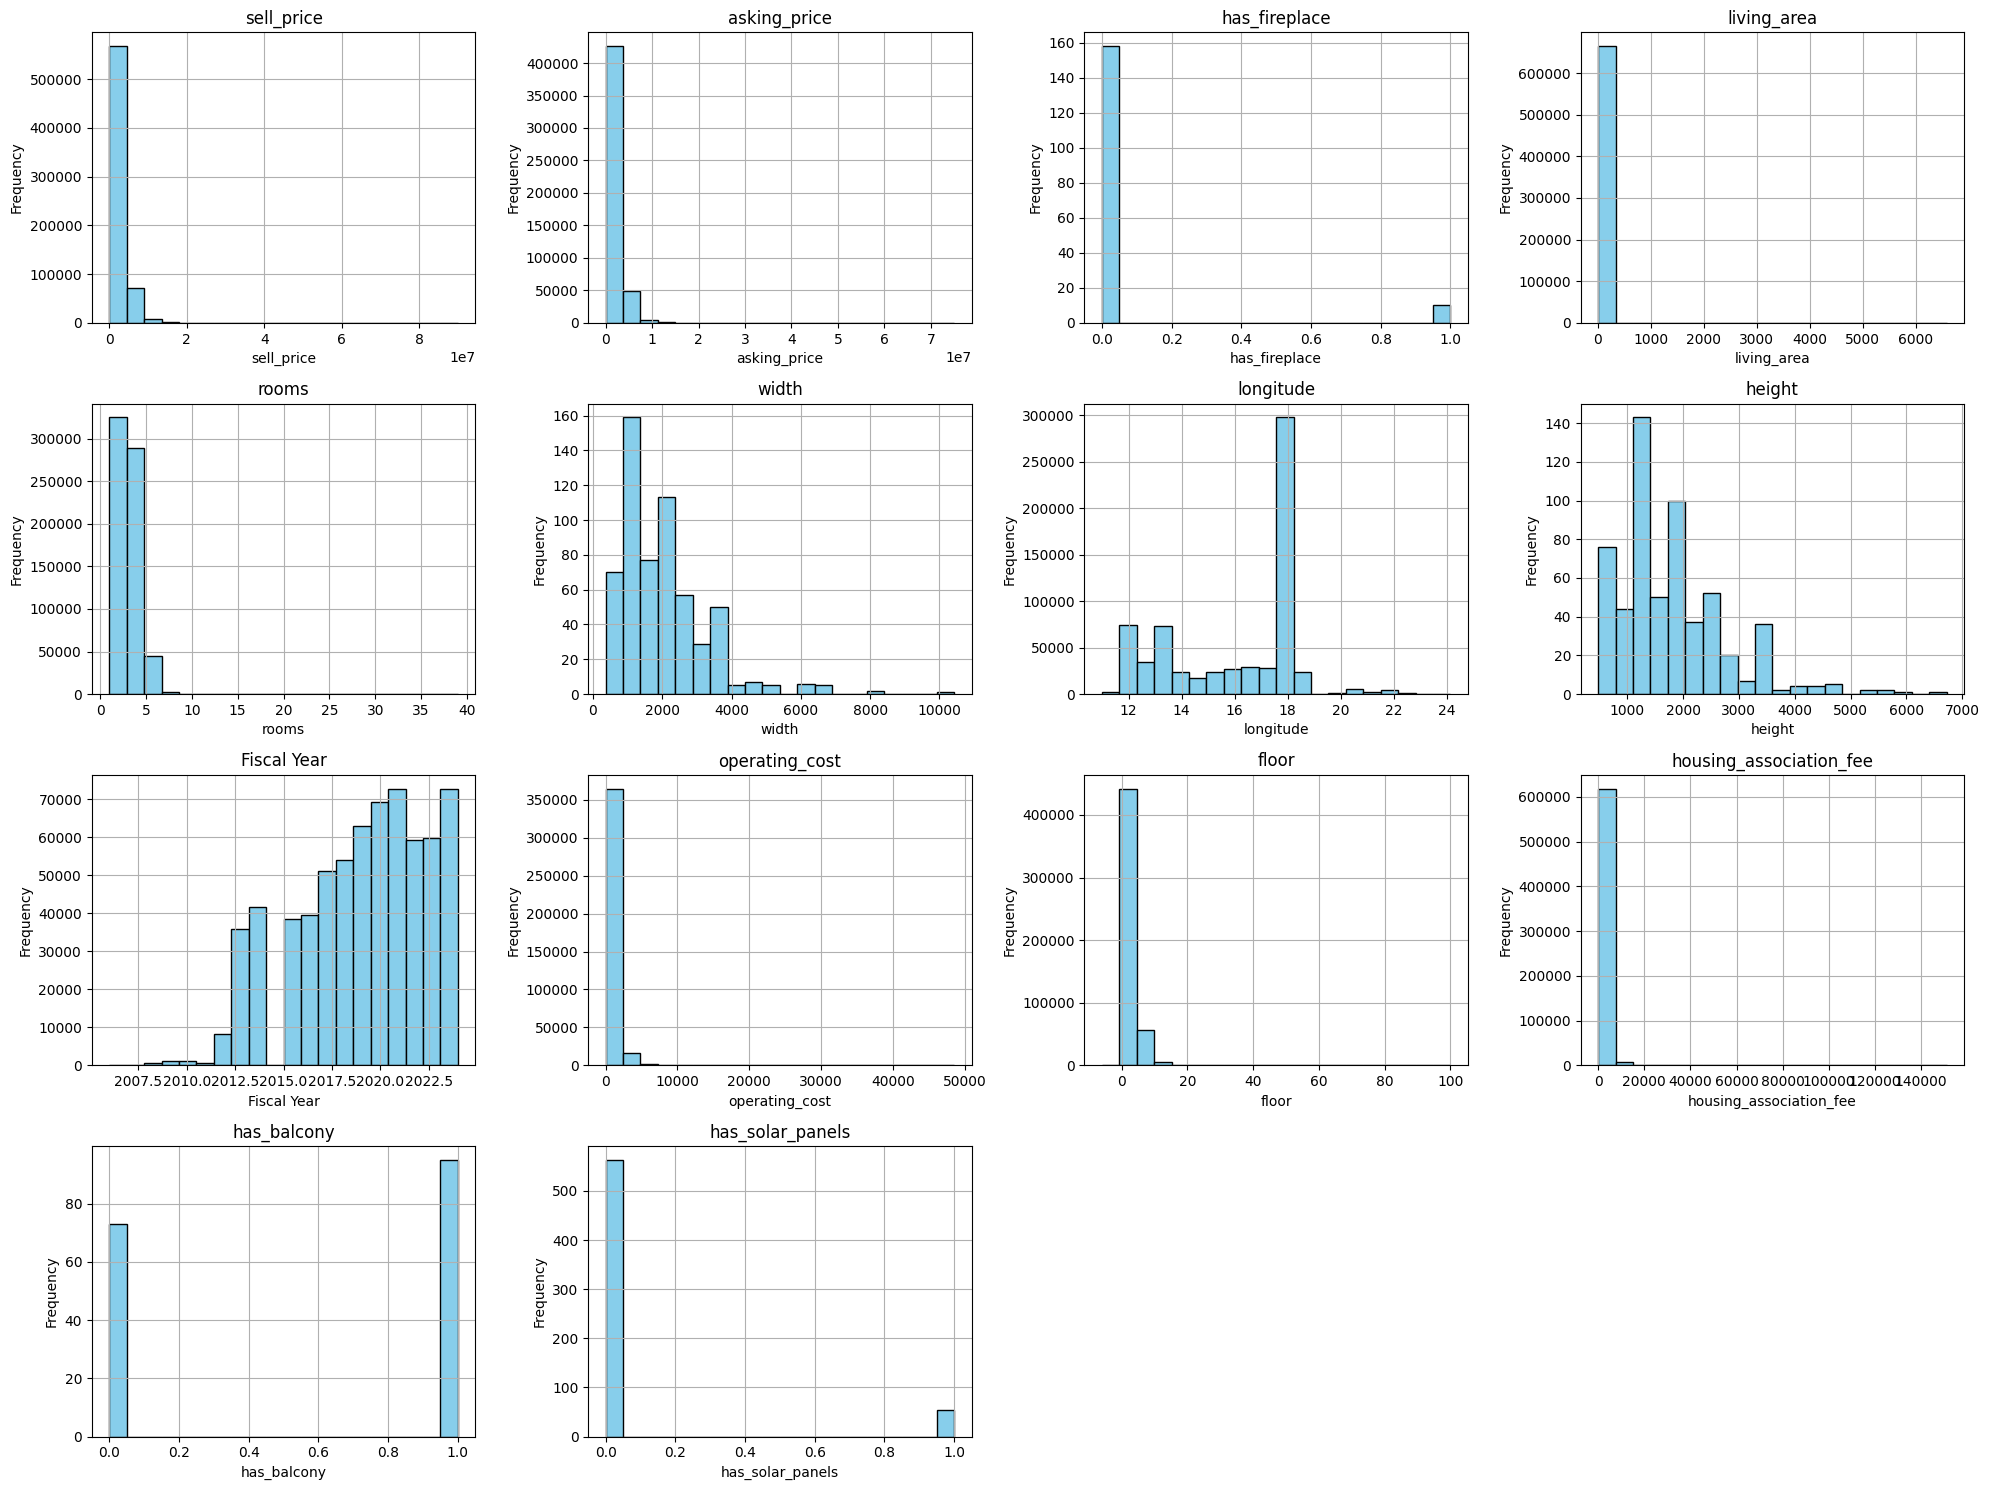

In [ ]:
# Loop through the features and plot histograms
plt.figure(figsize=(20, 15))  # Adjust size to fit multiple plots

for i, feature in enumerate(high_correlated_features, 1):
    plt.subplot(4, 4, i)  # Create a grid of 4x4 subplots
    eda_apartment[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

Comment about Distribution:


## Map of Swedish Housing Price

In [ ]:
# Subset

geo_df = eda_apartment[['sell_price', 'longitude', 'latitude']].dropna()

In [ ]:
# Create GeoDataFrame with geometry
gdf = gpd.GeoDataFrame(
    geo_df,
    geometry=gpd.points_from_xy(geo_df.longitude, geo_df.latitude),
    crs="EPSG:4326"
)

# Load Sweden GeoJSON file
sweden = gpd.read_file('sweden.geojson')

# Plot the Sweden map
fig, ax = plt.subplots(figsize=(14, 14))
sweden.plot(ax=ax, color="blue", edgecolor="black", alpha=0.4)

# Scatterplot for sold prices
sns.scatterplot(
    x=gdf.geometry.x,  # Longitude
    y=gdf.geometry.y,  # Latitude
    hue="sell_price",
    data=gdf,
    legend="auto",
    size="sell_price",
    sizes=(10, 200),
    ax=ax
)

# Add a title
plot.set_xlabel("Longitude")
plot.set_ylabel("Latitude")
plt.title("Sold Prices in Sweden")
plt.show()

#### Some observations from the above plot:
* As expected, sales are clustered around metropolitan areas (Sthlm, Gbg, Mlmö) and thin out towards the North.
* Little variation in `sell_price` visible in plot

### Some bonus EDA questions

I want to explore more to understand about the data. Lets stick to the high correlated features we defined:

In [ ]:
sell_price_correlation

,sell_price
sell_price,1.000000
asking_price,0.989878
has_fireplace,0.501736
living_area,0.348326
rooms,0.340767
width,0.252754
longitude,0.218686
height,0.211996
Fiscal Year,0.193119
operating_cost,0.183008


1. How is asking price and sell price differences, throughout the time?

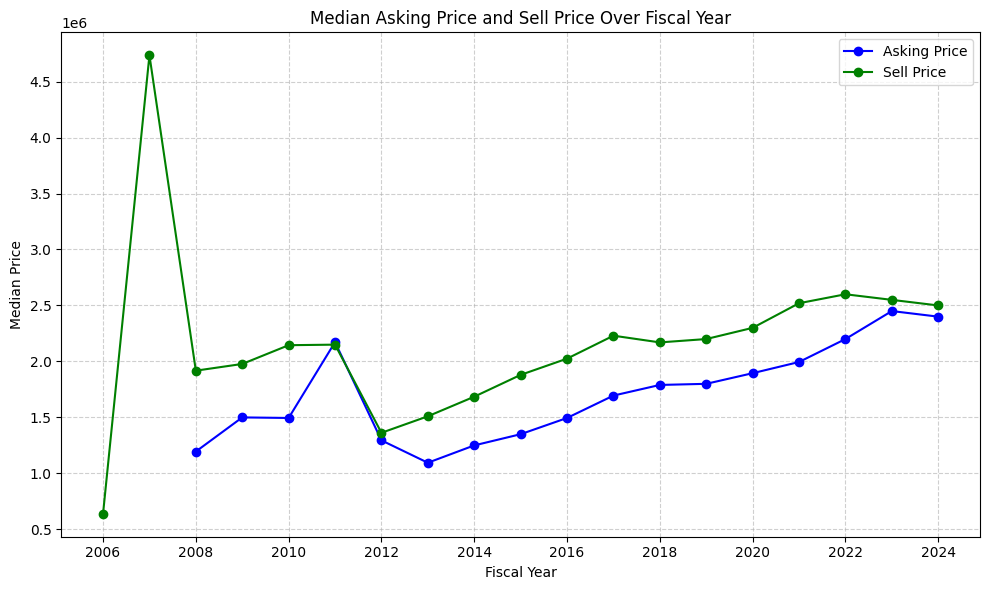

In [ ]:
# Group by Fiscal Year and calculate the median for asking_price and sell_price
median_prices = eda_apartment.groupby('Fiscal Year')[['asking_price', 'sell_price']].median().reset_index()

# Plot the median values
plt.figure(figsize=(10, 6))

# Plot Asking Price
plt.plot(median_prices['Fiscal Year'], median_prices['asking_price'], label='Asking Price', marker='o', color='blue')

# Plot Sell Price
plt.plot(median_prices['Fiscal Year'], median_prices['sell_price'], label='Sell Price', marker='o', color='green')

# Add titles and labels
plt.title('Median Asking Price and Sell Price Over Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Median Price')

# Prevent scientific notation for the y-axis
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))

# Prevent scientific notation for the x-axis if needed
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add grid and legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

I realize some trends here:
- The median asking price is always lower around 500k SEK vs. Sell_price thourghtout 2012
- The gaps closed up till 2024 - Is it a good trend?

2. How is house characteristics - living_area, rooms, width, height, floor impact with sell_price

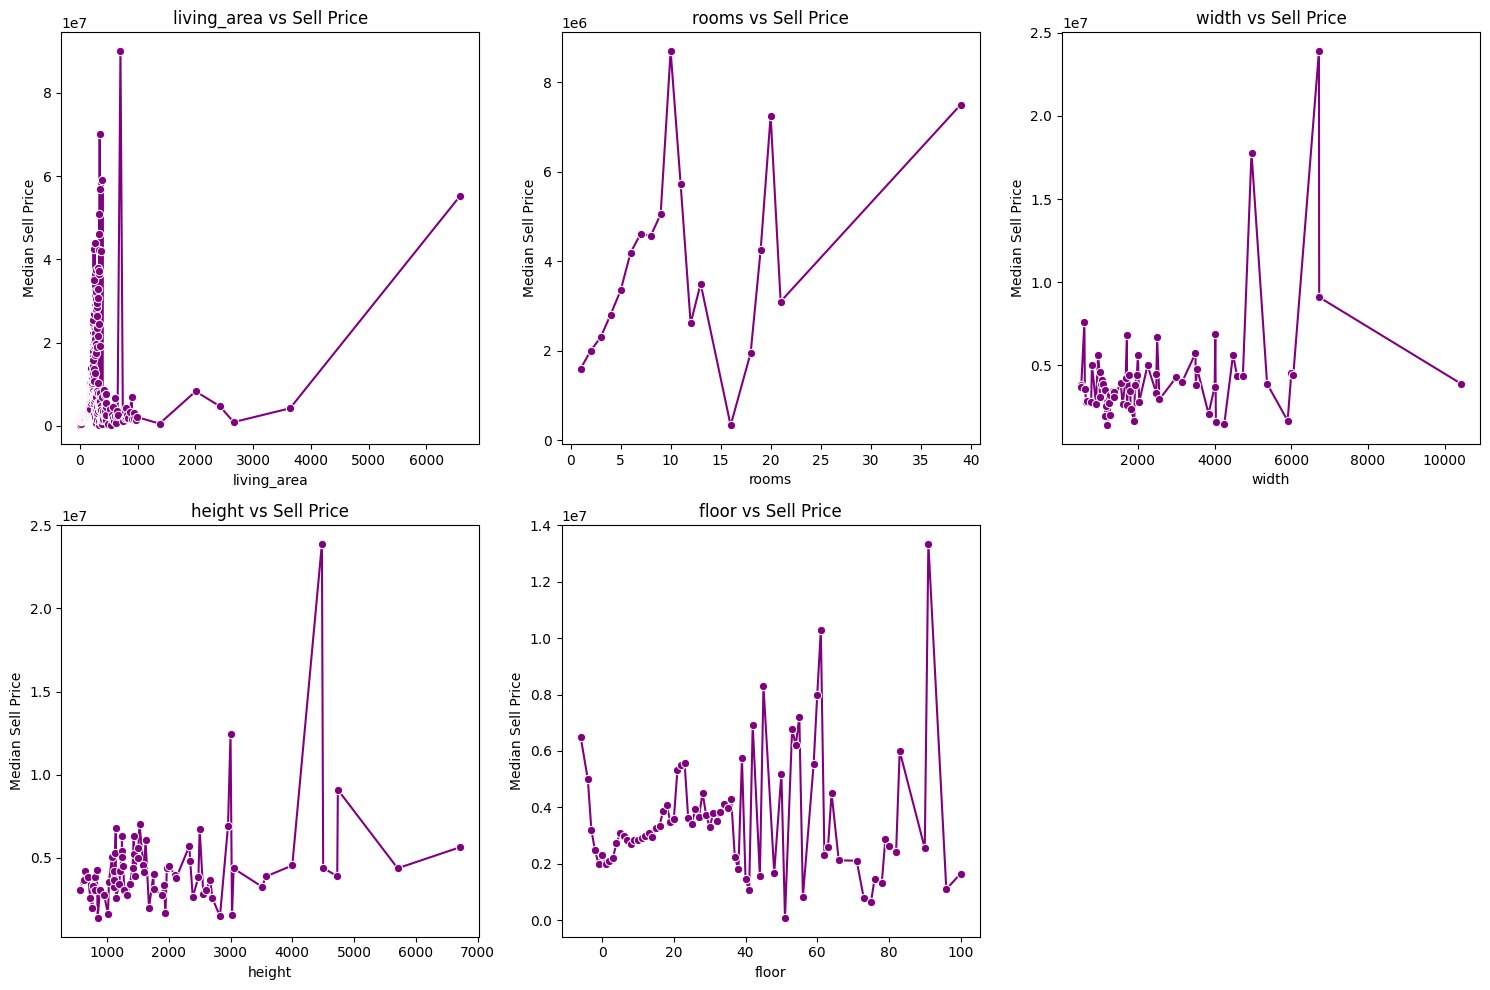

In [ ]:
# List of features to visualize
features = ['living_area', 'rooms', 'width', 'height', 'floor']

# Set up the plot size
plt.figure(figsize=(15, 10))

# Loop through the features and create line plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Create a grid of 2 rows, 3 columns
    
    # Group the data by the feature and calculate the mean sell_price
    grouped_data = eda_apartment.groupby(feature)['sell_price'].median().reset_index()
    
    # Create the line plot
    sns.lineplot(data=grouped_data, x=feature, y='sell_price', marker='o', color='purple')
    
    # Add title and labels
    plt.title(f'{feature} vs Sell Price')
    plt.xlabel(feature)
    plt.ylabel('Median Sell Price')

plt.tight_layout()
plt.show()

Comment some trend:

3. How are the has_ features has to do with sell_price

4. How are the operation cost and housing association fee impact on sell_price

## EDA on the joined Apartment_df

In [ ]:
apartment_joined = apartment_df.merge(annualreport_joined, left_on=['housing_association_org_number', 'fiscal_year'], right_on=['org_number', 'fiscal_year'], how='left')
apartment_joined.drop(['org_number'], axis=1, inplace=True)
apartment_joined.head()

In [ ]:
# Copy traning_cleaned to to eda_df
eda_df = apartment_joined.copy()

In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668801 entries, 0 to 668800
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sell_price                 649546 non-null  float64
 1   asking_price               668801 non-null  float64
 2   rooms                      668801 non-null  float64
 3   latitude                   668801 non-null  float64
 4   longitude                  668801 non-null  float64
 5   object_type                668801 non-null  object 
 6   association_tax_liability  668801 non-null  object 
 7   floor                      668801 non-null  float64
 8   municipality               668800 non-null  object 
 9   postcode                   668801 non-null  float64
 10  region                     668801 non-null  object 
 11  location                   668801 non-null  object 
 12  living_area                668801 non-null  float64
 13  housing_association_fee    66

In [ ]:
eda_df['year_of_sale'] = eda_df['year_of_sale'].astype(int)

### Sell and Asking Price Distributions

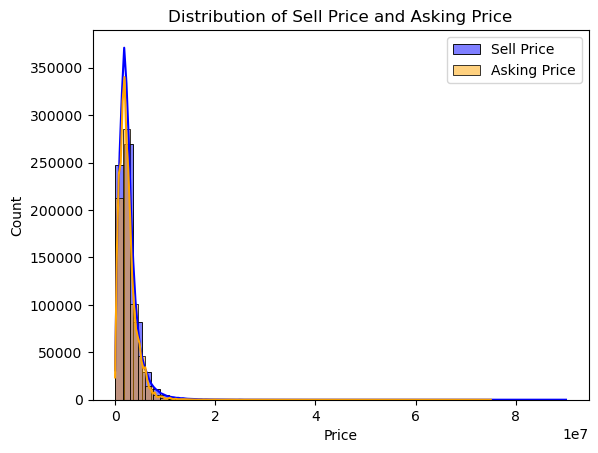

In [ ]:
sns.histplot(eda_df['sell_price'], kde=True, bins=50, color='blue', label='Sell Price')
sns.histplot(eda_df['asking_price'], kde=True, bins=50, color='orange', label='Asking Price')
plt.title('Distribution of Sell Price and Asking Price')
plt.xlabel('Price')
plt.legend()


output_path = os.path.join(output_folder, "price_dist.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

### Object type counts

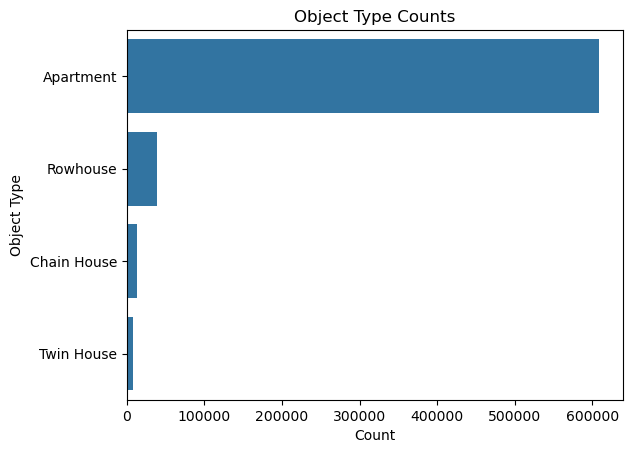

In [ ]:
sns.countplot(data=eda_df, y='object_type', order=eda_df['object_type'].value_counts().index)
plt.title('Object Type Counts')
plt.xlabel('Count')
plt.ylabel('Object Type')

output_path = os.path.join(output_folder, "ob_type.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')


### Average and Median Sell Price Over Time

In [ ]:
# Group data by year and calculate mean and median
mean_sell_prices = eda_df.groupby('year_of_sale')['sell_price'].mean()
median_sell_prices = eda_df.groupby('year_of_sale')['sell_price'].median()
mean_asking_prices = eda_df.groupby('year_of_sale')['asking_price'].mean()
median_asking_prices = eda_df.groupby('year_of_sale')['asking_price'].median()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(mean_prices, label='Average Sell Price', marker='o', color='blue')
plt.plot(median_prices, label='Median Sell Price', marker='s', color='orange')
plt.plot(mean_asking_prices, label='Average Asking Price', linestyle='--', marker='o', color='green')
plt.plot(median_asking_prices, label='Median Asking Price', linestyle='--', marker='s', color='red')

# Add labels, title, and legend
plt.title('Average and Median Sell and Asking Price Over Years', fontsize=14)
plt.xlabel('Year of Sale', fontsize=12)
plt.ylabel('Sell and Asking Price', fontsize=12)
plt.legend(title='Metric', fontsize=10)
plt.grid(True, alpha=0.6)

# Display the plot
plt.tight_layout()

output_path = os.path.join(output_folder, "sell_price_vs_asking_price.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the plot after saving





### Median Sell Price by Location and Year

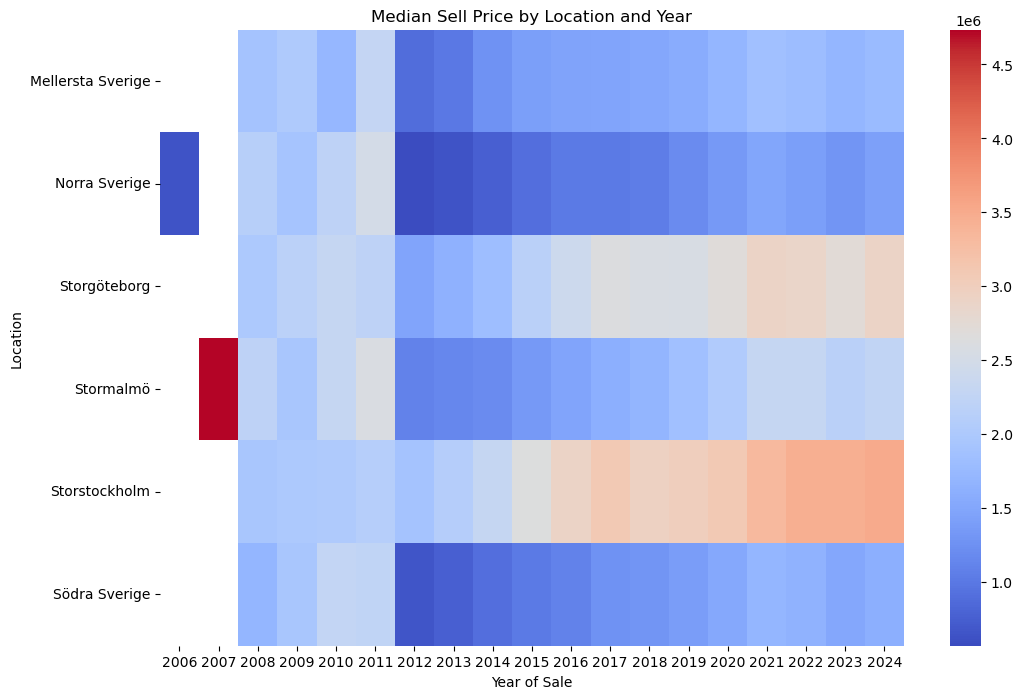

In [ ]:
price_trends = eda_df.pivot_table(index='location', columns='year_of_sale', values='sell_price', aggfunc='median')
plt.figure(figsize=(12, 8))
sns.heatmap(price_trends, cmap='coolwarm', annot=False, cbar=True)
plt.title('Median Sell Price by Location and Year')
plt.xlabel('Year of Sale')
plt.ylabel('Location')


output_path = os.path.join(output_folder, "medP_Loc.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')


### Object Type vs. Location vs. Sell Price

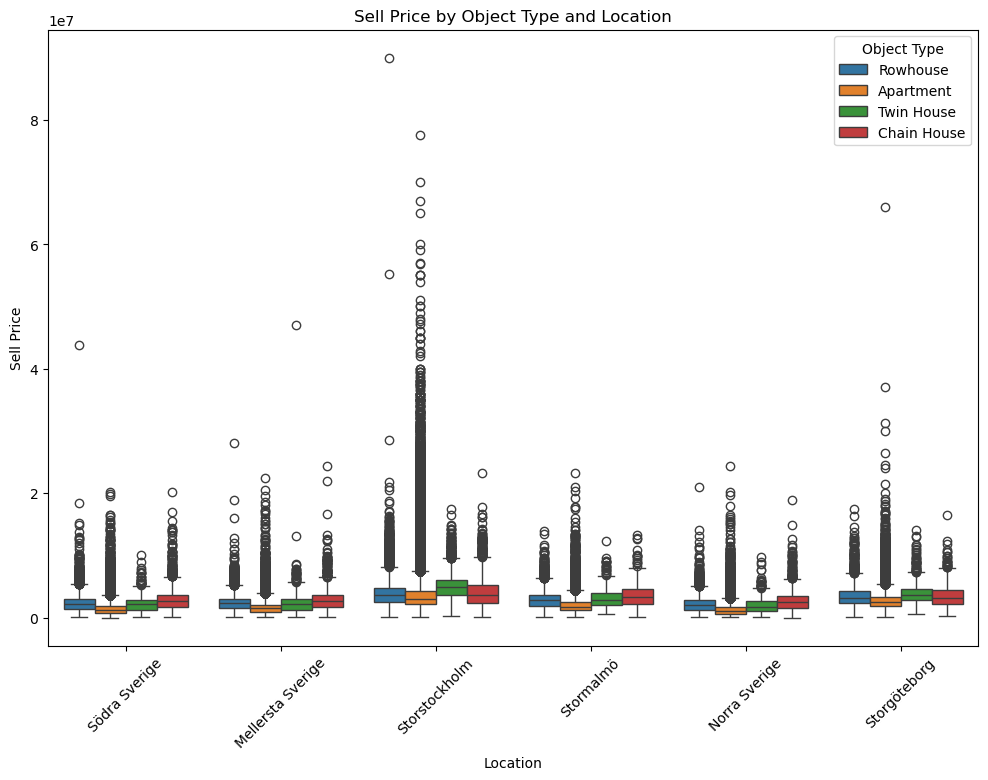

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=eda_df, x='location', y='sell_price', hue='object_type')
plt.title('Sell Price by Object Type and Location')
plt.xlabel('Location')
plt.ylabel('Sell Price')
plt.xticks(rotation=45)
plt.legend(title='Object Type')


output_path = os.path.join(output_folder, "SP_OT_Reg.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')


In [ ]:
# Calculate the number of sell_price entries per year
sell_prices_per_year = eda_df.groupby('year_of_sale')['sell_price'].count().reset_index()
sell_prices_per_year.columns = ['Year', 'Number of Sell Prices']

# Convert the table to LaTeX format
latex_table = sell_prices_per_year.to_latex(
    index=False,  # Don't include the index
    caption="Number of Sell Prices Per Year",  # Add a caption for the table
    label="tab:sell_prices_per_year",  # Add a label for referencing in LaTeX
    float_format="%.0f"  # Avoid scientific notation
)

# Print the LaTeX table
print(latex_table)


\begin{table}
\caption{Number of Sell Prices Per Year}
\label{tab:sell_prices_per_year}
\begin{tabular}{rr}
\toprule
Year & Number of Sell Prices \\
\midrule
2006 & 1 \\
2007 & 2 \\
2008 & 554 \\
2009 & 1214 \\
2010 & 1188 \\
2011 & 576 \\
2012 & 8232 \\
2013 & 35901 \\
2014 & 41616 \\
2015 & 38356 \\
2016 & 39423 \\
2017 & 51059 \\
2018 & 54022 \\
2019 & 62916 \\
2020 & 69244 \\
2021 & 72755 \\
2022 & 59294 \\
2023 & 59845 \\
2024 & 53348 \\
\bottomrule
\end{tabular}
\end{table}



### Correlation Plots of Key Variables

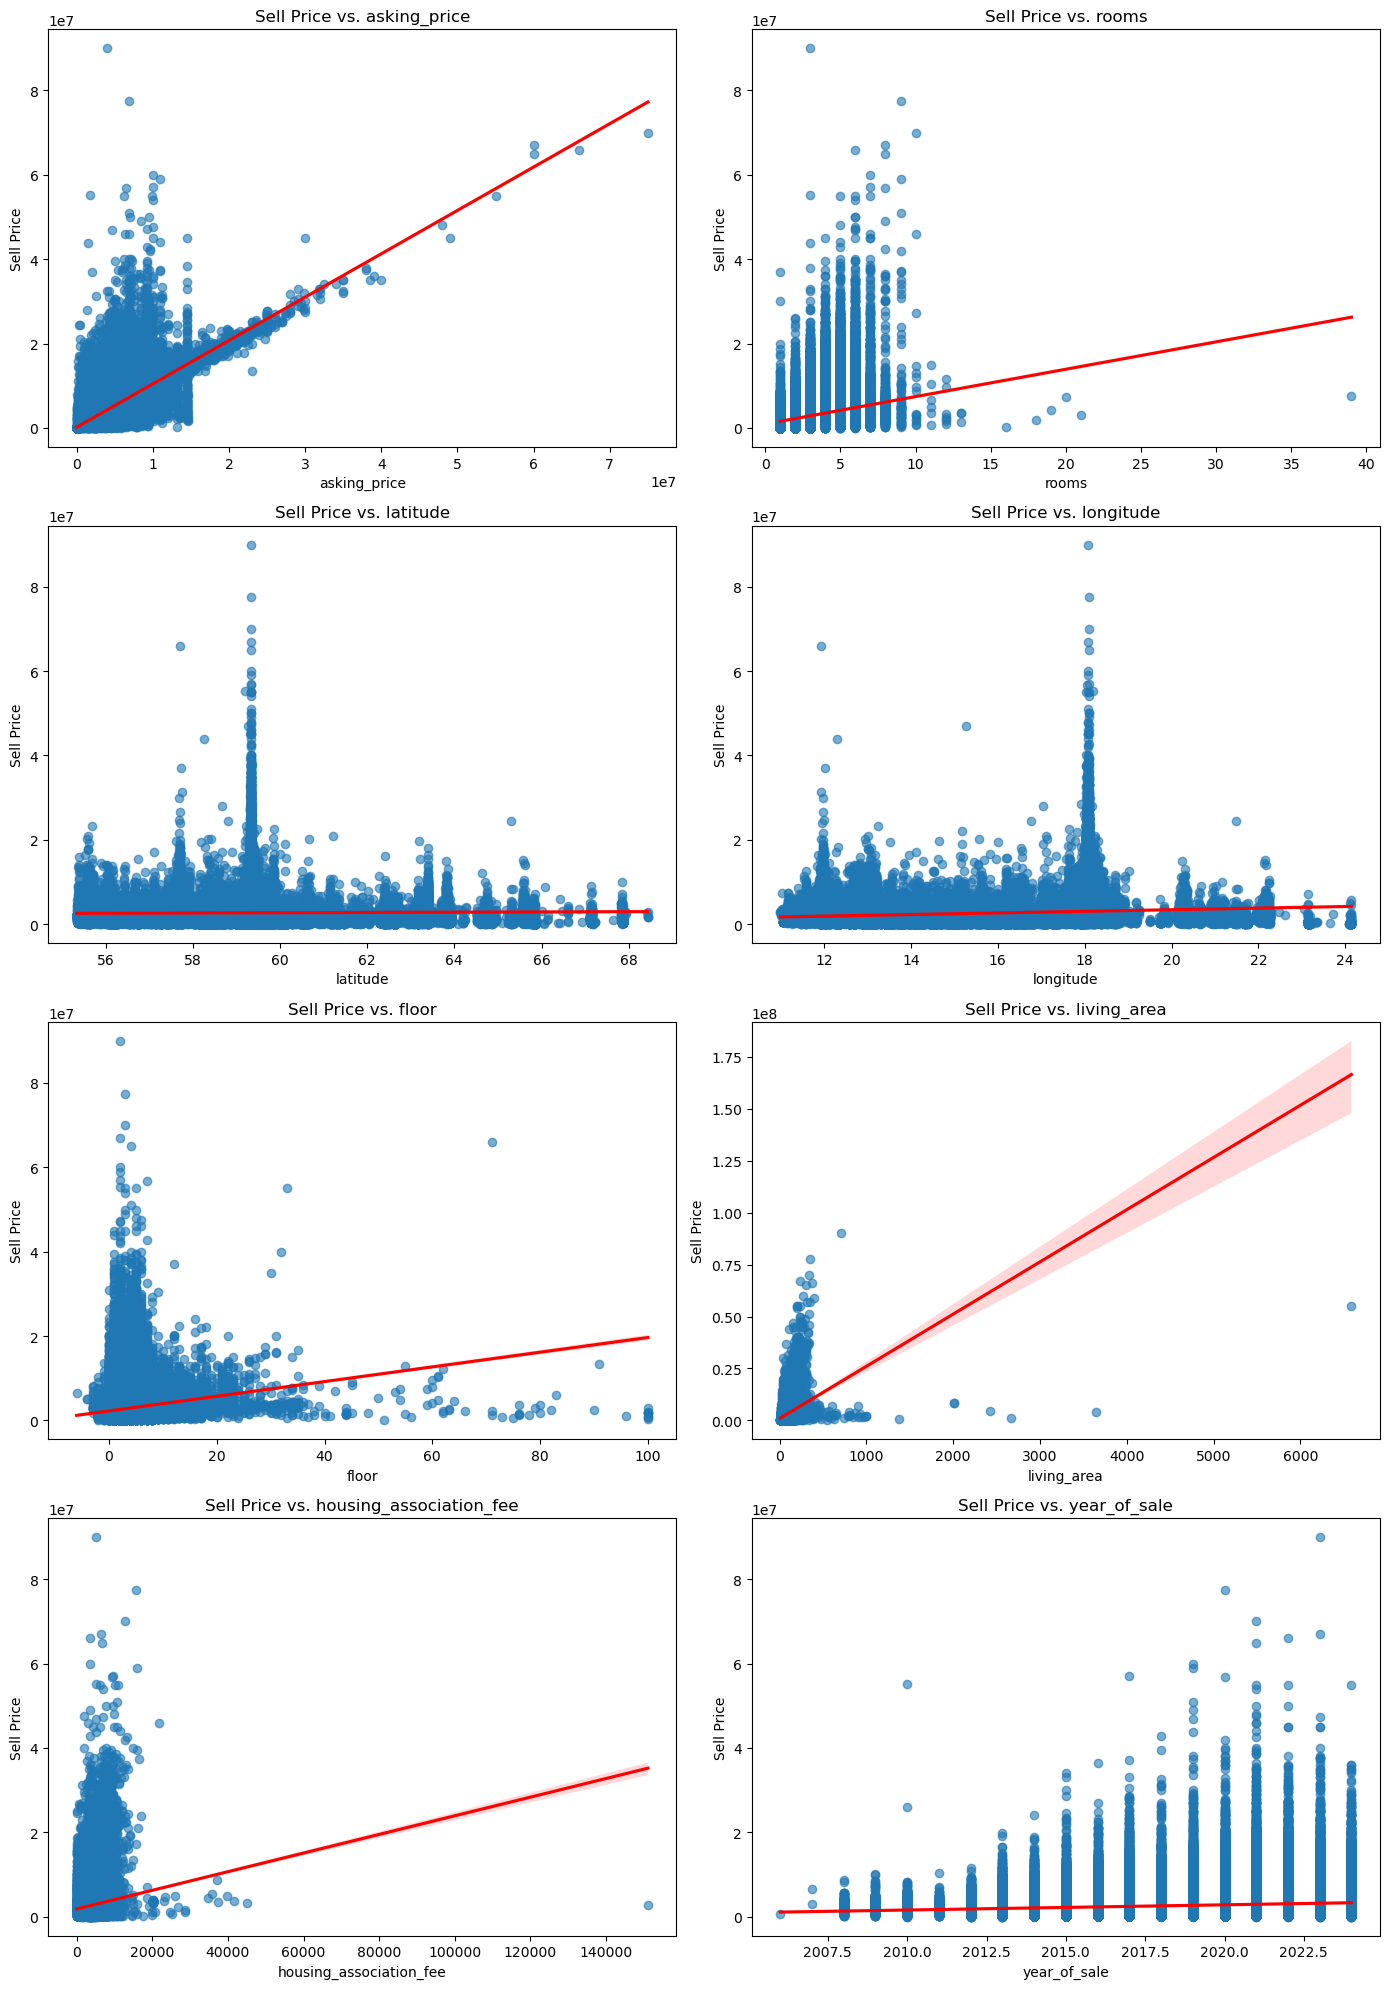

In [ ]:
# List of variables to plot
key_variables = [
    'asking_price', 'rooms', 'latitude', 'longitude', 
    'floor', 'living_area', 'housing_association_fee', 'year_of_sale'
]

# Set up the subplot grid (2 plots per row)
num_vars = len(key_variables)
num_cols = 2
num_rows = (num_vars + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create scatterplots with line of best fit
for i, var in enumerate(key_variables):
    sns.regplot(
        x=var, 
        y='sell_price', 
        data=eda_df, 
        ax=axes[i], 
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f'Sell Price vs. {var}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Sell Price')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()